# **Amazon stars reviews prediction - NLP**
## **Clasificación Binaria**
            
            


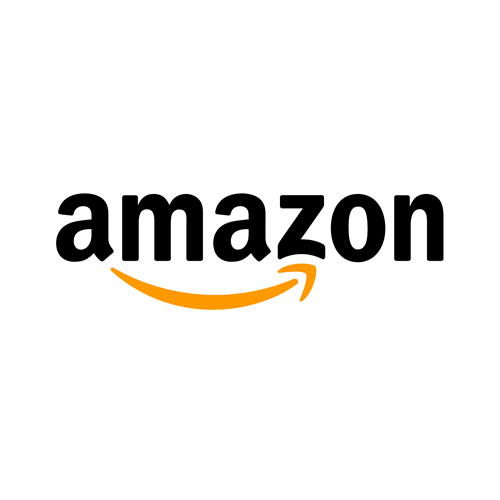

Este proyecto tiene como fin, profundizar en las conclusiones dispuestas en mi proyecto ["Amazon-Stars-Reviews-Project"](https://github.com/Naquiao/Amazon-Stars-Reviews-Project).

Dicho esto, cabe destacar que se utilizará el mismo [Dataset](https://drive.google.com/uc?export=download&id=11XnXB7Ubgf3t6gotXGlM4FCwPOMHhDLX) provisto por [The Multilingual Amazon Reviews Corpus](https://registry.opendata.aws/amazon-reviews-ml/).

---



El objetivo de este proyecto es sustancialmente el mismo; crear un modelo qué, en base a la reseña de un producto, prediga cuantas estrellas tendrá el mismo. 


# **Resumen del proyecto anterior**

En el proyecto se utilizaron las bases de datos anteriormente mencionadas para crear el modelo. Se siguió un pipeline de trabajo que tiene la siguiente esquema:



1.   `Normalización`
2.   `Vectorización`
3.   `Modelo`

En la etapa de **Normalización**, se realizó la limpieza del dataset. Se utilizaron funciones de limpieza tales como: Eliminación de RegEx, eliminación de tildes, eliminación de emojis y emoticones, eliminación de Stopwords y palabras menores a 3 letras.

Una vez aplicadas estas funciones,se obtuvieron los comentarios normalizados (o comentarios limpios). A partir de estos comentarios limpios se crearon dos features debido a tecnicas de normalización especiales :


*   El primero fue la aplicación de SnowballStemmer de la librería NLTK, en donde se hizo el proceso de Stemming sobre los comentarios normalizados.
*   El segundo, fue la Lematización de los comentarios normalizados a partir de la librería spaCy.

En conclusión de esta etapa, se obtuvieron 3 columnas: 


**A.   Comentarios Normalizados**

**B.   Comentarios Stematizados**

**C.   Comentarios Lematizados**

En la etapa 2, de **Vectorización**, se probaron 5 modelos diferentes de bag of words.

1.   `Count Vectorizer`
2.   `TF`
3. `TF - IDF: Uni-grama`
4. `TF - IDF: Uni-grama + Bi-grama`
5. `TF - IDF: Bi-grama`

Los mejores resultados se presentaron en TF - IDF de unigramas y bigramas, seguido del método TF (TF-IDF sin la penalización del IDF).

En la última etapa se definió un modelo benchmark, un clasificador Naive Bayes Gaussiano. 

Se probaron otros dos modelos. Una máquina de soporte vectorial (Support Vector Machine) con un kernel linear (por ende, un LinearSVC de la librería scikit-learn) y un Random Forest. Se utilizaron los hiperparámetros por defecto en los 3 modelos. 

Se probaron los 3 tipos de comentarios para cada uno de los modelos. En donde las mejores métricas las tuvo el conjunto de datos normalizados ( a lo que llamamos en el proyecto Data-Clean o el nombre de la columna 'review_boddy'), el segundo lugar lo obtuvo los comentarios de la data stematizada.

Por lo tanto, se eligió el mejor modelo, que fúe el SVM lineal con los comentarios normalizados.

Se optimizaron los hiperparámetros del modelo mediante tecnica de Randomized Search y Grid Search. Y finalmente se hizo un cross-validation con 8 folds, en los cuales los resultados finales de nuestro modelo de clasificación multiclase fueron 49% del conjunto de test.

Por lo tanto, resultado final:

---




**CLASIFICACIÓN MULTICLASE GENERAL:**

<font color='BLUE'>**ACCURACY PARA TRAIN: 50%**</font>

<font color='GREEN'>**ACCURACY PARA TEST: 49%**</font>



---


**CLASIFICACIÓN MULTICLASE DIRECCIONADA:**

Para el dataset de **`'Beauty'`**:

<font color='tomato'>**ACCURACY PARA TRAIN: 48,4%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 44,5%**</font>

Para el dataset de **`'Kitchen'`**:

<font color='tomato'>**ACCURACY PARA TRAIN: 52%**</font>

<font color='lawngreen'>**ACCURACY PARA TEST: 44,9%**</font>









# **Planificación del proyecto**

Debido al bajo performance que tuvo el modelo anterior, me propuse mejorar las métricas. 

1.   **Clasificación Binaria**

Mediante la transformación del problema de predicción de estrellas a predicción de comentario positivo o negativo. Lo que equivale a decir que vamos a transformar un problema de clasificación multiclase (1, 2, 3, 4 o 5 estrellas) a un problema de clasificación binario.

# **Clasificación Binaria**

## **Obtención de Datos**

In [ ]:
!python -m spacy download es_core_news_sm
#Reiniciar kernel una vez instalada esta librería

     |████████████████████████████████| 16.2MB 22.0MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp37-none-any.whl size=16172935 sha256=51a1059179a4d61db7655ee750db0c5cd225a569e5e7dd23cba3f4182e140f47
  Stored in directory: /tmp/pip-ephem-wheel-cache-nu326ufr/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import itertools
import nltk
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import gc

nltk.download('punkt')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos dataset de desarrollo
data_dev = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_dev.json', lines = True)
print("- Cantidad de filas del set de desarrollo:", data_dev.shape[0])

# Importamos dataset de entrenamiento
data_train = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_train.json', lines = True)
print("- Cantidad de filas del set de entrenamiento :", data_train.shape[0])

# Importamos dataset de prueba
data_test = pd.read_json('/content/drive/MyDrive/NLP PROJECT/dataset_es_test.json', lines = True)
print("- Cantidad de filas del set de prueba :", data_test.shape[0])

- Cantidad de filas del set de desarrollo: 5000
- Cantidad de filas del set de entrenamiento : 200000
- Cantidad de filas del set de prueba : 5000


In [ ]:
# Concatenamos todos
data = pd.concat([data_dev,data_train,data_test])
data = data.reset_index(drop=True)
data.tail()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
209995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
209996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
209997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
209998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports
209999,es_0794544,product_es_0130307,reviewer_es_0651938,5,Pues este tipo de cascos si que son inalambric...,Auriculares sin cables de verdad,es,electronics


In [ ]:
# Liberamos espacio de memoria
del(data_dev)
del(data_train)
del(data_test)
gc.collect()

106

In [ ]:
print(data.shape)
data.head()

(210000, 8)


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


## **Data Preprocessing**

In [ ]:
data.stars.value_counts()

5    42000
4    42000
3    42000
2    42000
1    42000
Name: stars, dtype: int64

Tenemos 5 clases, correspondientes a las estrellas atribuídas. Dado que queremos convertirlo a un problema de clasificación binario, vamos a eliminar las instancias donde la cantidad de estrellas es = 3 ( con el objetivo de deshacernos de la ambigüedad).

In [ ]:
data = data.drop(data[data['stars']==3].index)

In [ ]:
data.stars.value_counts()

5    42000
4    42000
2    42000
1    42000
Name: stars, dtype: int64

Eliminadas las instancias de 3 estrellas, ahora vamos a convertir las instancias de 1 y 2 estrellas en '0' y las instancias de 4 y 5 estrellas en '1'.

In [ ]:
#Convierto a valores binarios
data['stars'] = data['stars'].map(lambda x: 0 if(x==1 or x ==2) else 1)

In [ ]:
data.stars.value_counts()

1    84000
0    84000
Name: stars, dtype: int64

Elimino los features que no voy a utilizar en el modelo

In [ ]:
data.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

In [ ]:
data = data.drop(['review_id', 'product_id',
                  'reviewer_id','review_title',
                  'language', 'product_category'],axis=1)

###**Funciones**


**1- Función de limpieza de RegEx**

In [ ]:
import re
import string

def clean_text_round1(text):
   text = text.lower()
   text = re.sub('\[.*?¿\]\%', ' ', text)
   text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
   text = re.sub('\w*\d\w*', '', text)
   text = re.sub('[‘’“”…«»]', '', text)
   text = re.sub('\n', ' ', text)
   
   return text

**2- Eliminación de tildes.**

In [ ]:
def basic_text_cleanup(text):
    """
    Convert to lowercase, remove punctuation, remove digits
    """
    text = text.lower() #lower case
    text = re.sub("[^\w|\s]", " ",text) #replace non word and non space characters by a space
    text = re.sub("\s+", " ",text) #remove extra spaces
    text = re.sub("á", "a",text) #saco acentos
    text = re.sub("é", "e",text) #saco acentos
    text = re.sub("í", "i",text) #saco acentos
    text = re.sub("ó", "o",text) #saco acentos
    text = re.sub("ú", "u",text) #saco acentos
    text = re.sub(",", "",text) #saco comas
    #doc = nlp(text)#convert to a spacy object
    #doc = [w.text for w in doc if not w.is_stop or w.text =="no"] # remove stopwords but keep "no" for bigrams
    #doc = [w for w in doc if (len(w)> 2 or w == "no")] #only words longer than 2 characters
    #doc = [w for w in doc if (len(w)> 2 )] #only words longer than 2 characters
    #doc = [w for w in doc if w != "y"] #remove "y"
    #doc = " ".join(doc)
    return text


In [ ]:
import re
from unicodedata import normalize
def no_acentos(frase):
    # -> NFD y eliminar diacríticos
    frase_sin = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", frase), 0, re.I
        )

    # -> NFC
    return normalize( 'NFC', frase_sin).lower()

**3- Función de limpieza de emojis**

In [ ]:
#Eliminamos los emojis de los comentarios. Tale como 😜 , 😔 , etc.
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

**4- Función de limpieza de emoticones**

In [ ]:
!pip install emot


In [ ]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Remover emoticones tales como :-) , :'( , etc
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

**5-StopWords modificadas**

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Sacamos algunas palabras del set stopword que queremos conservar en las reviews:
list_a_conservar=['no', 'tuvo', 'poco', 'nada', 'ni', 'mucho', 'muchos', 'contra']
for mant_palabra in list_a_conservar:
    stopwords.remove(mant_palabra)

In [ ]:
# Eliminamos tildes, dierecis, etc de las stopwords.
stopwords = [no_acentos(word) for word in stopwords]

In [ ]:
def eliminar_stopwords(comentario):
    # Eliminamos las palabras de menos de 3 letras
    frase = nltk.word_tokenize(comentario)
    frase_lista = [palabra for palabra in frase if (len(palabra)>2 or palabra in ['no','ni','si','ma'])]
    
    # Sacamos las Stopwords
    frase_lista = [palabra for palabra in frase_lista if not palabra in stopwords ]
    
    # Por ultimo volvemos a unir la lista
    frase = " ".join(frase_lista)
    return frase

## **Normalización**

### **1-Limpieza de texto**

In [ ]:
#Limpiamos el texto según las funciones definidas anteriormente.
data['review_body'] =  data['review_body'].apply(clean_text_round1)
data['review_body'] =  data['review_body'].apply(remove_emoji)
data['review_body'] =  data['review_body'].apply(remove_emoticons)
data['review_body'] =  data['review_body'].apply(basic_text_cleanup)
data['review_body'] =  data['review_body'].apply(eliminar_stopwords)

### **2- Stemming**

In [ ]:
df_stemm = data.copy()
df_stemm.head()

,stars,review_body
0,0,malisimo grande demasiado aparatoso mal protec...
1,0,no recibido pedido no devolucion
2,0,buscar sistema no funciona bien abrazadera lle...
3,0,utilice brocas menor diametro doblaron varias ...
4,0,no gusta olor viejo aspecto malo


In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [ ]:
comentario_list=[]
for comentario in df_stemm.review_body:
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    comentario=re.sub("[^a-zA-Z]"," ",str(comentario))
    # Pasamos todo a minúsculas
    comentario=comentario.lower()
    # Tokenizamos para separar las palabras del titular
    comentario=nltk.word_tokenize(comentario)
    # Eliminamos las palabras de menos de 3 letras
    comentario= [palabra for palabra in comentario if len(palabra)>3]
    # Sacamos las Stopwords
    comentario = [palabra for palabra in comentario if not palabra in stopwords]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    comentario=[stemmer.stem(palabra) for palabra in comentario]
    # Por ultimo volvemos a unir el titular
    comentario=" ".join(comentario)
    
    # Vamos armando una lista con todos los comentarios
    comentario_list.append(comentario)

In [ ]:
df_stemm["review_body"] = comentario_list

In [ ]:
data['review_body_stemm']= df_stemm["review_body"]
data.head()

,stars,review_body,review_body_stemm
0,0,malisimo grande demasiado aparatoso mal protec...,malisim grand demasi aparat protector pantall
1,0,no recibido pedido no devolucion,recib ped devolucion
2,0,buscar sistema no funciona bien abrazadera lle...,busc sistem funcion bien abrazader llev agarr ...
3,0,utilice brocas menor diametro doblaron varias ...,utilic broc menor diametr dobl vari mantequill...
4,0,no gusta olor viejo aspecto malo,gust olor viej aspect mal


### **3- Lemmatization**

In [ ]:
# Previamente
## !python -m spacy download es_core_news_sm
#Si bien ya lo hice antes, uno debe reiniciar el kernel cada vez que instala esta librería

import spacy # https://spacy.io/usage/models
nlp = spacy.load('es_core_news_sm')

#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

# Quitamos de las stopwords palabras como 'no', 'bueno', 'buena' que nos pueden ser últiles para predecir
stopwords_spacy.remove('no') # En los comentarios negativos es muy repetida
stopwords_spacy.remove('bueno')
stopwords_spacy.remove('buena')
stopwords_spacy.remove('tarde')
stopwords_spacy.remove('temprano')
stopwords_spacy.remove('día')
stopwords_spacy.remove('días')
stopwords_spacy.remove('dia')
stopwords_spacy.remove('dias')
stopwords_spacy.remove('grandes')
stopwords_spacy.remove('general')

In [ ]:
'''
#Constante de signos de puntuación
import string
puntua = string.punctuation + '¡¿...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X']
'''

In [ ]:
'''
#Defino una función para lematizar
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens
'''

Una vez que está definida la función de lematizar, se la aplicamos al df, para crear una lista con cada uno de los comentarios lematizados.
Es un proceso muy exigente a nivel computacional, por lo que cambiaremos el tipo de entorno de ejecución por una GPU.

La siguiente celda está comentada para no volverse a ejecutar. La operación tuvo un tiempo de 3 horas y 38 minutos.

In [ ]:
# Limpiamos todas las reviews con lemmatizer
# %%time
# reviews_lemma = []
# for i in df.index:
#     rev = text_data_lemma(df.review_body.iloc[i])
#     reviews_lemma.append(" ".join(rev))
# reviews_lemma[:5]

CPU times: user 3h 36min 14s, sys: 2min 37s, total: 3h 38min 51s
Wall time: 3h 38min 20s


Se creó una lista. La transformo a un pandas DataFrame y la descargo para poder trabajar en el futuro.

In [ ]:
#Creo DataFrame a partir de la lista
#df_lemma = pd.DataFrame(reviews_lemma)

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
#   df_lemma.to_csv('df_lemma.csv')
#   !cp df_lemma.csv '/content/drive/MyDrive/NLP PROJECT/df_lemma.csv'

In [ ]:
#Descargo desde Google Drive
lemma = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/df_lemma.csv')

In [ ]:
#Asigno nueva columna al df con el que vamos a trabajar
data['review_body_lemma']= lemma['0']
data.tail()

### **DF Normalizado.**

Ahora tenemos en el df 4 columnas:

1.   `review_body` : corresponden a todos los comentarios normalizados en la etapa de Data Cleaning
2.   `review_body_stemm`: corresponde a todos los comentarios normalizados con Data Cleaning y luego Stemizados.

3. `review_body_lemma`: corresponde a todos los comentarios normalizados con Data Cleaning y luego Lematizados.

4. `Stars`: va a ser el target de nuestro ML model



Guardamos la base de datos para poder utilizarla más adelante

In [ ]:
# Almaceno el DF en formato csv dentro de mi Drive
data.to_csv('df_normalizado_binario.csv')
!cp df_normalizado_binario.csv '/content/drive/MyDrive/NLP PROJECT/df_normalizado_binario.csv'

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/df_normalizado_binario.csv')
data=data.drop('Unnamed: 0',axis=1)
data

Eliminación de instancias faltantes


In [ ]:
#Verificamos que no se hayan perdido datos en el proceso
data.isna().sum().sum()

128

In [ ]:
# Dado que se perdieron 170 datos en total, los eliminaremos
data = data.dropna()

In [ ]:
# Verificamos
data.isna().sum().sum()

0

## **Vectorización**

Siguiendo la línea del proyecto anterior, utilizaremos el modelo de vectorización TF-IDF con unigramas y bigramas

In [ ]:
# TT split
from sklearn.model_selection import train_test_split

#Pipeline
from sklearn.pipeline import Pipeline

# Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Modelos
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#Optimización hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Data Cleaning
reviews_cl = data['review_body'].values
stars_cl = data['stars'].values

# Stemming
reviews_st = data['review_body_stemm'].values
stars_st = data['stars'].values

#Lemmatization
reviews_le = data['review_body_lemma'].values
stars_le = data['stars'].values

In [ ]:
X_train_cl, X_test_cl, ytrain_cl, ytest_cl = train_test_split(reviews_cl,stars_cl,test_size=0.3,
                                                  random_state=42,stratify=stars_cl)

In [ ]:
X_train_st, X_test_st, ytrain_st, ytest_st = train_test_split(reviews_st,stars_st,test_size=0.3,
                                                  random_state=42,stratify=stars_st)

In [ ]:
X_train_le, X_test_le, ytrain_le, ytest_le = train_test_split(reviews_le,stars_le,test_size=0.3,
                                                  random_state=42,stratify=stars_le)

In [ ]:
tfidf_cl = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
tfidf_st = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))
tfidf_le = TfidfVectorizer(max_features = 1000, ngram_range=(1,2))

## **Modelo**

### Funciones de Evaluación

In [ ]:
#Función para plotear la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    stars=['Bueno','Malo']
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("Valor Predicho")
    plt.ylabel("Valor Verdadero")
    ax.set_xticklabels(stars)
    ax.set_yticklabels(stars)
    plt.show()

    return

In [ ]:
def evaluar_modelo(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", round(acc_train,4))
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", round(acc_test,4))

    print(classification_report(y_test, y_pred))
    confusion(y_test, y_pred)
    return  acc_train, acc_test

In [ ]:
def evaluar_modelo_simple(model_fit, X_train, X_test, y_train, y_test):
    print(model_fit)
    acc_train = model_fit.score(X_train, y_train)
    print("Accuracy en train: ", round(acc_train,4))
    y_pred = model_fit.predict(X_test)
    acc_test = accuracy_score(y_pred, y_test)
    print("Accuracy en test: ", round(acc_test,4))

    print(classification_report(y_test, y_pred))
    
    return  acc_train, acc_test

### **Modelo con Data Clean**

In [ ]:
#Definimos el vectorizador para Data_Clean ('review_body')
tfidf_cl = tfidf_cl.fit(X_train_cl)
X_train_cl = tfidf_cl.transform(X_train_cl).toarray()
X_test_cl = tfidf_cl.transform(X_test_cl).toarray()

**Naive Bayes - Benchmark**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.8338
Accuracy en test:  0.832
              precision    recall  f1-score   support

           0       0.85      0.80      0.83     25191
           1       0.81      0.86      0.84     25173

    accuracy                           0.83     50364
   macro avg       0.83      0.83      0.83     50364
weighted avg       0.83      0.83      0.83     50364



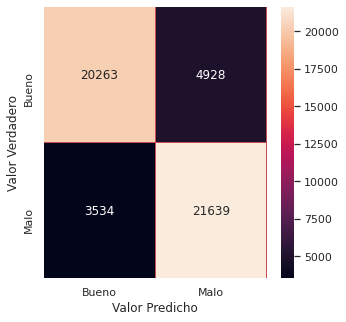

(0.8338325646305972, 0.8319831625764434)

In [ ]:
clf = GaussianNB()
clf.fit(X_train_cl,ytrain_cl)
evaluar_modelo(clf ,X_train_cl ,X_test_cl ,ytrain_cl ,ytest_cl)

Linear SVC

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.8815
Accuracy en test:  0.8783
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     25191
           1       0.88      0.87      0.88     25173

    accuracy                           0.88     50364
   macro avg       0.88      0.88      0.88     50364
weighted avg       0.88      0.88      0.88     50364



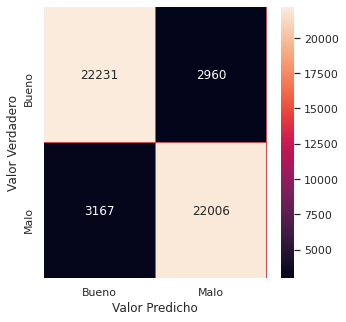

(0.8815460285582994, 0.8783456437137638)

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_cl,ytrain_cl)
evaluar_modelo(clf ,X_train_cl ,X_test_cl ,ytrain_cl ,ytest_cl)

**Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.8185
Accuracy en test:  0.81
              precision    recall  f1-score   support

           0       0.82      0.79      0.81     25191
           1       0.80      0.83      0.81     25173

    accuracy                           0.81     50364
   macro avg       0.81      0.81      0.81     50364
weighted avg       0.81      0.81      0.81     50364



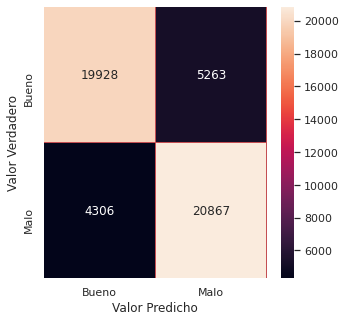

(0.8185067311128886, 0.8100031768723691)

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_cl,ytrain_cl)
evaluar_modelo(clf ,X_train_cl ,X_test_cl ,ytrain_cl ,ytest_cl)

### **Modelo con Data Stemmizada**

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_st = tfidf_st.fit(X_train_st)
X_train_st = tfidf_st.transform(X_train_st).toarray()
X_test_st = tfidf_st.transform(X_test_st).toarray()

**Naive Bayes - Benchmark**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.8091
Accuracy en test:  0.8064
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     25191
           1       0.79      0.83      0.81     25173

    accuracy                           0.81     50364
   macro avg       0.81      0.81      0.81     50364
weighted avg       0.81      0.81      0.81     50364



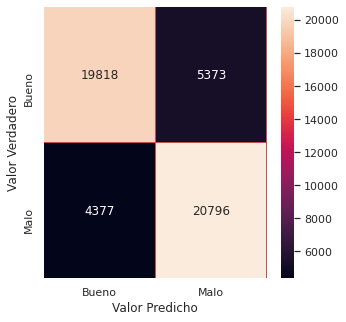

(0.8090695576697244, 0.8064093400047653)

In [ ]:
clf = GaussianNB()
clf.fit(X_train_st,ytrain_st)
evaluar_modelo(clf ,X_train_st ,X_test_st ,ytrain_st ,ytest_st)

**Linear SVC**

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.8598
Accuracy en test:  0.8562
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     25191
           1       0.86      0.85      0.86     25173

    accuracy                           0.86     50364
   macro avg       0.86      0.86      0.86     50364
weighted avg       0.86      0.86      0.86     50364



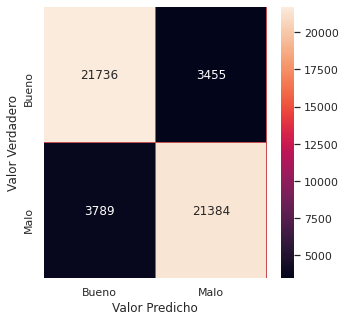

(0.8597869190053951, 0.8561671034866174)

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_st,ytrain_st)
evaluar_modelo(clf ,X_train_st ,X_test_st ,ytrain_st ,ytest_st)

**Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy en train:  0.8069
Accuracy en test:  0.7981
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     25191
           1       0.83      0.75      0.79     25173

    accuracy                           0.80     50364
   macro avg       0.80      0.80      0.80     50364
weighted avg       0.80      0.80      0.80     50364



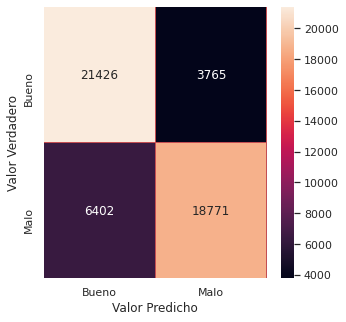

(0.8069421515734295, 0.7981296163926614)

In [ ]:
clf = RandomForestClassifier(max_depth= 14)
clf.fit(X_train_st,ytrain_st)
evaluar_modelo(clf ,X_train_st ,X_test_st ,ytrain_st ,ytest_st)

### **Modelo con Data Lematizada**

In [ ]:
#Definimos el vectorizador para Data_Stemmatizasa ('review_body_stemm')
tfidf_le = tfidf_le.fit(X_train_le)
X_train_le = tfidf_le.transform(X_train_le).toarray()
X_test_le = tfidf_le.transform(X_test_le).toarray()

**Naive Bayes - Benchmark**

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy en train:  0.7904
Accuracy en test:  0.7861
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     25191
           1       0.76      0.83      0.79     25173

    accuracy                           0.79     50364
   macro avg       0.79      0.79      0.79     50364
weighted avg       0.79      0.79      0.79     50364



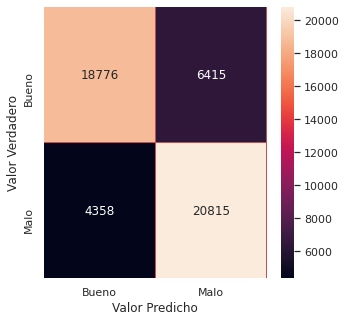

(0.7904079513930256, 0.786097212294496)

In [ ]:
clf = GaussianNB()
clf.fit(X_train_le,ytrain_le)
evaluar_modelo(clf ,X_train_le ,X_test_le ,ytrain_le ,ytest_le)

**Linear SVC**

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.836
Accuracy en test:  0.8311
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     25191
           1       0.84      0.82      0.83     25173

    accuracy                           0.83     50364
   macro avg       0.83      0.83      0.83     50364
weighted avg       0.83      0.83      0.83     50364



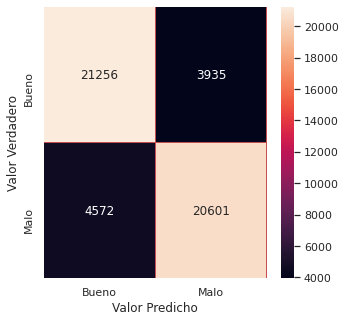

(0.8359769899756625, 0.8310896672226193)

In [ ]:
clf = LinearSVC(C = 20, max_iter= 500)
clf.fit(X_train_le,ytrain_le)
evaluar_modelo(clf ,X_train_le ,X_test_le ,ytrain_le ,ytest_le)

**Random Forest**

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy en train:  0.7753
Accuracy en test:  0.7676
              precision    recall  f1-score   support

           0       0.72      0.88      0.79     25191
           1       0.84      0.66      0.74     25173

    accuracy                           0.77     50364
   macro avg       0.78      0.77      0.76     50364
weighted avg       0.78      0.77      0.76     50364



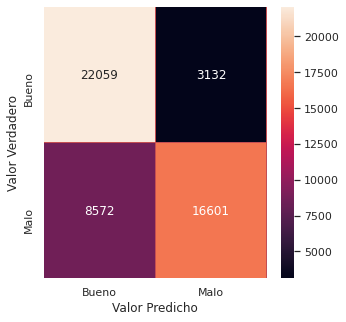

(0.7752778392361761, 0.7676117861964895)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100, random_state=42,max_depth = 14)
clf.fit(X_train_le,ytrain_le)
evaluar_modelo(clf ,X_train_le ,X_test_le ,ytrain_le ,ytest_le)

### **Elección de Datos y Modelos.**

Al igual que en el proyecto anterior, el mejor performance se da utilizando la máquina de soporte vectorial con un kernel lineal, sobre la base de datos normalizada simple (Data Clean o 'review_body').

Esta vez, con una mejora importante en todas sus métricas, ya que el accuracy del modelo previo a la optimización es de <font color='green'>**87,8%**</font> en el conjunto de test. 


###**Optimización de hiperparámetros**

**Grid Search 1**

In [ ]:
#Grid Search 1
param_grid = {'C':[0.01,0.1,1,1.1]}
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid,cv=5)
model.fit(X_train_cl,ytrain_cl)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'C': 1}
Mejor Score: 0.876967861683015



In [ ]:
#CrossVal para GS1 
%%time
results = cross_validate(clf, X_train_cl, ytrain_cl, cv=8, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Accuracy promedio en test: ', round(np.mean(results['test_score']),4))

Accuracy promedio en test:  0.8771
CPU times: user 368 ms, sys: 399 ms, total: 767 ms
Wall time: 11.1 s


**Grid Search 2**

In [ ]:
#Grid Search 2
%%time
param_grid = {'C':[0.1,1,2],
              'penalty':['l1', 'l2'],
              'tol': [1e-3, 1e-4, 1e-5]}
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid,cv=5)
model.fit(X_train_cl,ytrain_cl)

print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'C': 1, 'penalty': 'l2', 'tol': 0.0001}
Mejor Score: 0.876967861683015

CPU times: user 1min 15s, sys: 5.47 s, total: 1min 20s
Wall time: 1min 14s


In [ ]:
#CrossVal para GS2
%%time
results = cross_validate(clf, X_train_cl, ytrain_cl, cv=8, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Accuracy promedio en test: ', round(np.mean(results['test_score']),4))

Accuracy promedio en test:  0.8772
CPU times: user 372 ms, sys: 420 ms, total: 792 ms
Wall time: 11.3 s


**Randomized Search**

In [ ]:
#Randomized Search 
#fijamos seed = 0
svc_o = LinearSVC(dual = False,
                  random_state= 0)

#Parámetros para  RandomizedSearchCV
params = {  'penalty': ['l1', 'l2'],              #norma de regularizacion
             'loss' : ['hinge', 'squared_hinge'], #tipo función de pérdida
             'fit_intercept': ['True','False'],           #tolerancia para el error
             'C': [10, 20, 50],                   #parámetro clave del modelo SVC
             'max_iter': [500, 1000]              #número máximo de iteraciones 
         }
                 
svc_rs = RandomizedSearchCV( estimator = svc_o, 
                             param_distributions = params, 
                             n_iter = 15, 
                             cv = 5,               #crossvalidation de 5-folds
                             scoring = 'accuracy'
                            )


svc_rs.fit(X_train_cl,ytrain_cl)

print('Los mejores parámetros son:', svc_rs.best_params_, '\n')
print('El mejor score es:', svc_rs.best_score_)

Los mejores parámetros son: {'penalty': 'l2', 'max_iter': 1000, 'loss': 'squared_hinge', 'fit_intercept': 'False', 'C': 10} 

El mejor score es: 0.8769253113886102


In [ ]:
#CrossVal para RS
%%time 
results = cross_validate(clf, X_train_cl, ytrain_cl, cv=9, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Accuracy promedio en test: ', round(np.mean(results['test_score']),4))

Accuracy promedio en test:  0.8769
CPU times: user 405 ms, sys: 416 ms, total: 821 ms
Wall time: 13.3 s


### **Modelo Final**

Dado que el mejor performance se alcanzó mediante los hiperparámetros obtenidos en el segundo Grid Search, definimos nuestro modelo final.

Los hiperparámetros serán:

     {'C': 1, 'penalty': 'l2', 'tol': 0.0001}

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Accuracy en train:  0.8814
Accuracy en test:  0.8782
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     25191
           1       0.88      0.87      0.88     25173

    accuracy                           0.88     50364
   macro avg       0.88      0.88      0.88     50364
weighted avg       0.88      0.88      0.88     50364



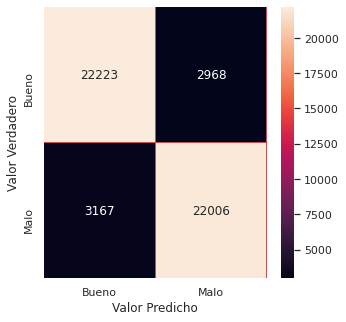

(0.8814183841925217, 0.8781868000953061)

In [ ]:
clf = LinearSVC(C = 1, max_iter= 500, penalty = 'l2', tol = 0.0001)
clf.fit(X_train_cl,ytrain_cl)
evaluar_modelo(clf ,X_train_cl ,X_test_cl ,ytrain_cl ,ytest_cl)

In [ ]:
#Cross Validation para 12 folds
results = cross_validate(clf, X_train_cl, ytrain_cl, cv=12, return_train_score=True, scoring='accuracy', n_jobs=-1)
print('Accuracy promedio en train =  ', round(np.mean(results['train_score']),4))
print('Accuracy promedio en test =  ', round(np.mean(results['test_score']),4))

Accuracy promedio en train =   0.8815
Accuracy promedio en test =   0.8774


## **Conclusión**

Finalmente, luego de convertir nuestro problema de clasificación multiclase, a un problema de clasificación binario, obtuve una mejora importante en el performance del modelo.

El modelo final fue un modelo de clasificación basado en una máquina de soporte vectorial con un kernel lineal, cuyas métricas finales fueron:

Accuracy en conjunto de Train : <font color='cyan'>**88,15%**</font> 

Accuracy en conjunto de Test:   <font color='magenta'>**87,74%**</font> 

Con una varianza menor al medio punto porcentual, manteniendo un performance altísimo, arriba del 85%.

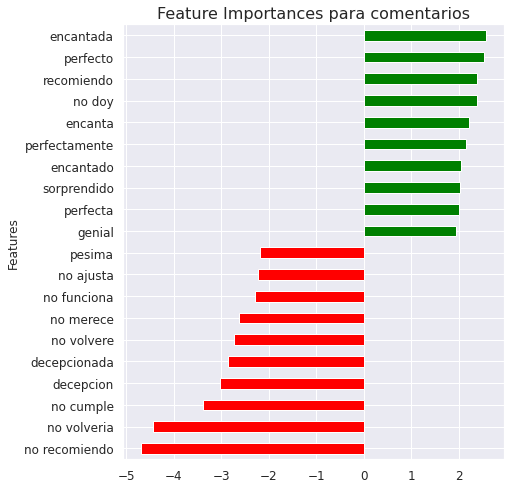

In [ ]:
plt.figure(figsize = (15,8))
all_words = tfidf_cl.get_feature_names()
for n_star in range(0,1):
    
    coeff = list(clf.coef_[n_star])
    labels = list(all_words)

    features = pd.DataFrame()
    features['Features'] = labels
    features['Importance'] = coeff
    features = features.reset_index(drop=True)
    features_sort = features.sort_values(by=['Importance'], ascending=True)
    features_sort = features_sort.reset_index(drop=True)
    
    plt.subplot(1, 2, n_star+1)
    data_plot = pd.concat([features_sort.head(10), features_sort.tail(10)])
    data_plot.sort_values(by=['Importance'], ascending=True, inplace = True)
    data_plot['positive'] = data_plot['Importance'] > 0
    data_plot.set_index('Features', inplace = True)
    data_plot.Importance.plot(kind='barh', 
                              color = data_plot.positive.map({True: 'green', False: 'red'}),
                              fontsize=12)
    
    
    
    plt.title ('Importancia de los features ', fontsize=16)
    plt.title ('Feature Importances para comentarios', fontsize=16)
plt.show()